# Personality Survey Data Analysis

In this notebook we will be looking at a personality survey data which over 1 million people have taken from all over the world.  The data was obtained from Kaggle:  https://www.kaggle.com/tunguz/big-five-personality-test

We are looking to answer the below questions:
    1.  Can we predict the person's country based on his survey answers?  
    2.  Can we predict a person's time spent on the survey based on his survey answers?
    3.  Are the questions in a group correlated with one another more than with other questions in other groups?
    4.  Can we predict the person's country more accurately if we ignore some survey answers?


In [1]:
# Import needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Read in the data, it's a large file with over 1 million rows and 100 columns.
pers = pd.read_csv('./data-final.csv', sep='\t')

In [2]:
# Show a sample of the data
pers.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,2016-03-03 02:01:01,768.0,1024.0,9.0,234.0,6,1,GB,51.5448,0.1991
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,2016-03-03 02:01:20,1360.0,768.0,12.0,179.0,11,1,MY,3.1698,101.706
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,2016-03-03 02:01:56,1366.0,768.0,3.0,186.0,7,1,GB,54.9119,-1.3833
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,2016-03-03 02:02:02,1920.0,1200.0,186.0,219.0,7,1,GB,51.75,-1.25
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,2016-03-03 02:02:57,1366.0,768.0,8.0,315.0,17,2,KE,1.0,38.0


In [85]:
# Read in the codes which describes the data, especially the different questions that were asked
codes = pd.read_csv('./codebook.txt', sep='\t', skiprows=(0,1,2,3,4,5), names=['Code', 'Description'])

# Show a sample of the data
codes.head()

,Code,Description
0,EXT1,I am the life of the party.
1,EXT2,I don't talk a lot.
2,EXT3,I feel comfortable around people.
3,EXT4,I keep in the background.
4,EXT5,I start conversations.


In [73]:
# Check shapes
print(pers.shape)
print(codes.shape)

(1012050, 110)
(61, 2)


In [86]:
# Examine codes for any nulls
print(codes.isnull().sum())

# Take meaningful subset, first 50 rows for the questions
codes = codes[0:50]

# Show all the questions
codes

Code            0
Description    11
dtype: int64


,Code,Description
0,EXT1,I am the life of the party.
1,EXT2,I don't talk a lot.
2,EXT3,I feel comfortable around people.
3,EXT4,I keep in the background.
4,EXT5,I start conversations.
5,EXT6,I have little to say.
6,EXT7,I talk to a lot of different people at parties.
7,EXT8,I don't like to draw attention to myself.
8,EXT9,I don't mind being the center of attention.
9,EXT10,I am quiet around strangers.


In [9]:
# Examine questionnaire for nulls
print(pers.isnull().sum())

# Remove missing data
pers.dropna(inplace=True)

# Show remaining shape
pers.shape

EXT1                     1783
EXT2                     1783
EXT3                     1783
EXT4                     1783
EXT5                     1783
EXT6                     1783
EXT7                     1783
EXT8                     1783
EXT9                     1783
EXT10                    1783
EST1                     1783
EST2                     1783
EST3                     1783
EST4                     1783
EST5                     1783
EST6                     1783
EST7                     1783
EST8                     1783
EST9                     1783
EST10                    1783
AGR1                     1783
AGR2                     1783
AGR3                     1783
AGR4                     1783
AGR5                     1783
AGR6                     1783
AGR7                     1783
AGR8                     1783
AGR9                     1783
AGR10                    1783
                         ... 
CSN1_E                   1783
CSN2_E                   1783
CSN3_E    

(1012050, 110)

In [74]:
# Extract just the questions portion
questions = pers.loc[:, 'EXT1':'OPN10']

# Show the questions shape and a sample
print(questions.shape)
questions.head()

(1012050, 50)


,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0


In [76]:
# Compute the correlation
corr = questions.corr()
corr.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
EXT1,1.000000,-0.439176,0.464833,-0.486689,0.478206,-0.323423,0.581693,-0.368139,0.470624,-0.410394,...,0.033424,0.002407,0.079600,0.020569,0.186461,-0.059893,0.074705,0.017170,-0.064237,0.167155
EXT2,-0.439176,1.000000,-0.412273,0.552552,-0.500538,0.541775,-0.444535,0.397786,-0.364068,0.490812,...,-0.026528,0.055771,-0.020358,0.041261,-0.094361,0.093033,-0.016234,-0.016693,0.080863,-0.106235
EXT3,0.464833,-0.412273,1.000000,-0.433449,0.554566,-0.321947,0.540954,-0.291678,0.422393,-0.433824,...,0.038616,-0.025293,0.033988,0.014633,0.175156,-0.034684,0.135601,-0.026898,-0.040517,0.139018
EXT4,-0.486689,0.552552,-0.433449,1.000000,-0.459715,0.457623,-0.465724,0.488740,-0.434490,0.538443,...,-0.004476,0.083356,0.051647,0.053089,-0.101086,0.082407,-0.023546,0.014438,0.139391,-0.079120
EXT5,0.478206,-0.500538,0.554566,-0.459715,1.000000,-0.409655,0.588810,-0.312272,0.421797,-0.486922,...,0.090748,-0.036565,0.098615,-0.021563,0.220704,-0.076758,0.130984,0.058280,0.026923,0.208603


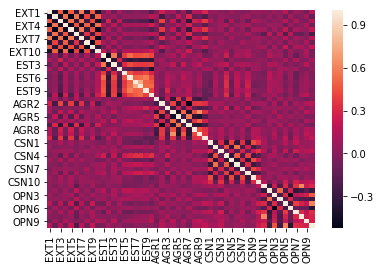

In [77]:
import seaborn as sns

# Show the heatmap
sns.heatmap(corr);

### Based on this heatmap above you can see that there are 5 correlated boxes of questions along the diagonal.  The orange and black colors in those boxes show that there is a strong positive correlation for some of the questions in the group for orange and a strong negative correlation for some of the questions in the group for black.

In [87]:
codes.head()

,Code,Description
0,EXT1,I am the life of the party.
1,EXT2,I don't talk a lot.
2,EXT3,I feel comfortable around people.
3,EXT4,I keep in the background.
4,EXT5,I start conversations.


### Based on the table below you can see which survey questions were left blank most often.  It seems that some of the stronger statements are the ones people had the most difficulty in answering.

In [88]:
# Find how many zeros are in the survey representing missing answers
zeros = (questions == 0.0).sum().to_frame(name='Missing Answers')

# Show which questions had the most missing answers
codes = codes.set_index('Code')
codes.head()
zeros.join(codes).sort_values(by='Missing Answers', ascending=False)

,Missing Answers,Description
CSN1,12174,I am always prepared.
EST6,10837,I get upset easily.
EST4,10640,I seldom feel blue.
AGR6,10348,I have a soft heart.
EXT5,9761,I start conversations.
EST2,9565,I am relaxed most of the time.
AGR2,9270,I am interested in people.
OPN1,9184,I have a rich vocabulary.
CSN10,8692,I am exacting in my work.
AGR8,8519,I take time out for others.


US    545414
GB     66373
CA     61751
AU     49595
PH     19839
Name: country, dtype: int64

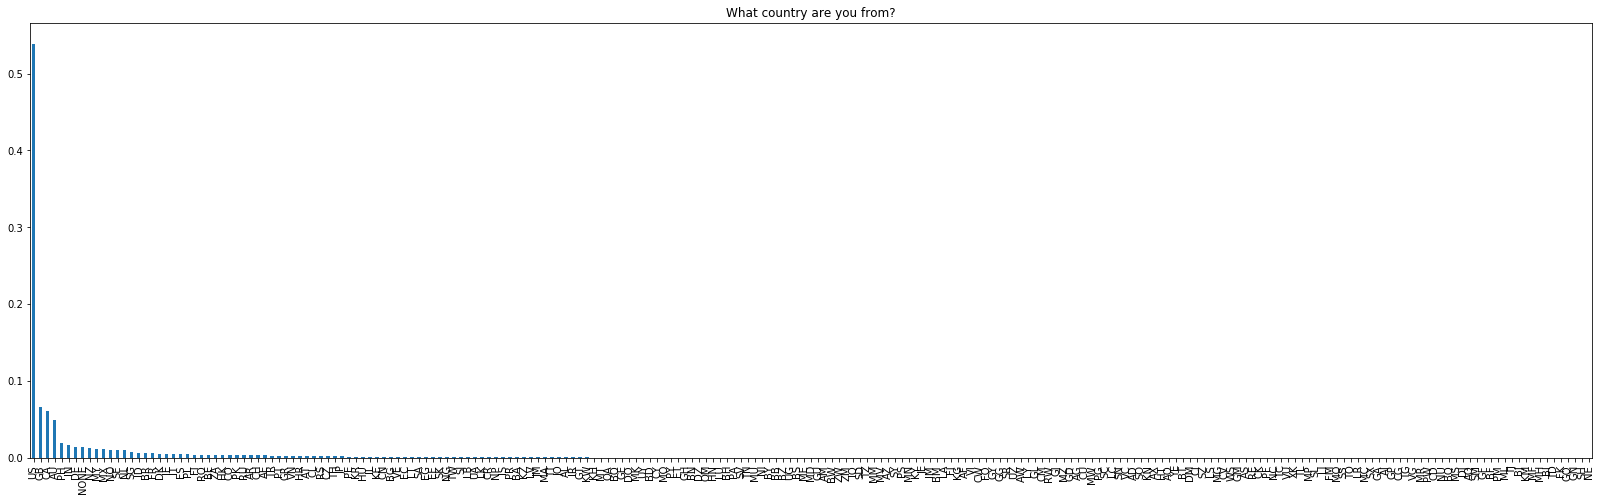

In [90]:
countries = pers['country'].value_counts()

# The below should be a bar chart of the proportion of individuals in each professional category if your status_vals
# is set up correctly.
(countries/pers.shape[0]).plot(kind="bar", figsize=(28, 8));
plt.title("What country are you from?");

countries.head()

### Based on the histogram above, you can see that the respondents mostly came from the US and a few other major countries with far fewer responses from other countries.

In [91]:
# Find the time spent on the survey for various countries
intro = pers.groupby('country')['introelapse'].mean().sort_values(ascending=False)
test = pers.groupby('country')['testelapse'].mean().sort_values(ascending=False)
end = pers.groupby('country')['endelapse'].mean().sort_values(ascending=False)

In [92]:
# show the top and bottom countries in terms of time spent in the intro
print(intro.head())
print(intro.tail())

country
AD    11016.647059
TN     9557.447917
CO     7956.835959
GY     7161.021739
QA     6801.202186
Name: introelapse, dtype: float64
country
AS    10.444444
FK     7.000000
GF     5.000000
PM     4.500000
KM     4.000000
Name: introelapse, dtype: float64


In [93]:
# show the top and bottom countries in terms of time spent in the test
print(test.head())
print(test.tail())

country
AF    27574.018519
MV     8276.695122
JE     5780.888889
UA     5484.616622
VC     4197.944444
Name: testelapse, dtype: float64
country
BT    207.785714
VU    191.571429
CD    189.000000
BF    155.000000
MS    101.500000
Name: testelapse, dtype: float64


In [94]:
# show the top and bottom countries in terms of time spent in the end
print(end.head())
print(end.tail())

country
MV    43820.317073
GB    23581.575475
EE    15774.047059
BN    13789.542510
KZ     6994.950570
Name: endelapse, dtype: float64
country
PF    9.000000
CD    8.333333
GQ    8.000000
AQ    8.000000
MS    6.500000
Name: endelapse, dtype: float64


In [95]:
# Find the average screen sizes for each country
width = pers.groupby('country')['screenw'].mean()
height = pers.groupby('country')['screenh'].mean()
dim = pd.concat([height, width], axis=1)

In [101]:
# Show the top and bottom countries for the dimensions
print(dim.sort_values('screenw').head())
print(dim.sort_values('screenw').tail())
print(dim.sort_values('screenh').head())
print(dim.sort_values('screenh').tail())

            screenh     screenw
country                        
FK       568.000000  320.000000
SM       640.000000  360.000000
GQ       640.000000  360.000000
MR       801.333333  487.666667
HT       709.266667  719.133333
             screenh  screenw
country                      
SH       1050.000000   1680.0
MF       1050.000000   1680.0
CU        960.666667   1689.5
AQ       1140.000000   1920.0
MS       1080.000000   1920.0
            screenh     screenw
country                        
FK       568.000000  320.000000
GQ       640.000000  360.000000
SM       640.000000  360.000000
CG       685.333333  988.666667
GM       701.900000  977.600000
             screenh  screenw
country                      
CU        960.666667   1689.5
MF       1050.000000   1680.0
SH       1050.000000   1680.0
MS       1080.000000   1920.0
AQ       1140.000000   1920.0


### The above likely shows the different devices that are prevalent in each country from mobile phones to desktop computers.  This also shows how advanced those devices are with higher resolutions indicating the latest technology is being used with higher definition screens

## Now let us try to predict the country based on the survey answers

In [102]:
from sklearn.model_selection import train_test_split

# questions has the question data
# answers will have the country data as categories converted to integers
countries = pers['country'].astype('category').cat.codes

# split the data into training and test data
X_train, X_test, y_train, y_test = train_test_split(questions, countries, test_size = 0.3, random_state=42)

In [103]:
from sklearn.linear_model import LogisticRegression

# Create and fit the logistic regression model, perfect for classification prediction
log_model = LogisticRegression(solver='lbfgs', multi_class='auto', verbose=10, max_iter=100)
log_model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 11.8min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 11.8min finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=10, warm_start=False)

In [104]:
from sklearn.metrics import accuracy_score

y_test_preds = log_model.predict(X_test) 

print("Accuracy score:  ", accuracy_score(y_test, y_test_preds))

Accuracy score:   0.53807947565173


### The accuracy of our model is 53.8%, ok but not great.  This seems to indicate that the survey answers cannot help pinpoint a person to a particular country very well.  Could it be that people really are unique all over the world?  Let's try to predict using a couple of other model types as well.

In [105]:
# Let's find the number of countries in our dataset as we'll need to use this to set the K and K nearest neighbors
len(countries.unique())

223

In [106]:
from sklearn.neighbors import KNeighborsClassifier

# Create and fit the KNN model, perfect for classification prediction
# Only use a subset of the training data as KNN is very slow!!
knn = KNeighborsClassifier(n_neighbors=len(countries.unique()))
knn.fit(X_train[:100000], y_train[:100000])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=223, p=2,
           weights='uniform')

In [107]:
from sklearn.metrics import accuracy_score

y_test_preds = knn.predict(X_test[:1000])

print("Accuracy score:  ", accuracy_score(y_test[:1000], y_test_preds[:1000]))

Accuracy score:   0.528


### KNN performed slightly worse to logistic regression, but in line with 52.8% accuracy.

In [109]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [110]:
from sklearn.metrics import accuracy_score

y_test_preds = dt_model.predict(X_test)

print("Accuracy score:  ", accuracy_score(y_test, y_test_preds))

Accuracy score:   0.317138481300331


### Decision tree was the worst performed with only 31.7% accuracy.

### Now let's try to only predict based on the top 20 columns that are correlated with the country

In [111]:
# Get the questions and country together
qandc = questions.astype(int)
qandc['country'] = countries
qandc.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,country
0,4,1,5,2,5,1,5,2,4,1,...,1,4,1,4,1,5,3,4,5,69
1,3,5,3,4,3,3,2,5,1,5,...,2,4,2,3,1,4,2,5,3,144
2,2,3,4,4,3,2,1,3,2,5,...,1,2,1,4,2,5,3,4,4,69
3,2,2,2,3,4,2,2,4,1,4,...,2,5,2,3,1,4,4,3,3,69
4,3,3,3,3,5,3,3,5,3,4,...,1,5,1,5,1,5,3,5,5,103


In [112]:
# Take the correlation for each question to the country
corr = qandc.corr()['country']
corr = corr.reset_index()
corr.head()

,index,country
0,EXT1,0.016791
1,EXT2,-0.020286
2,EXT3,0.028436
3,EXT4,-0.009885
4,EXT5,0.015496


In [113]:
# Find the most highly correlated 20 columns
# We take 21 columns because country will be included (perfectly correlated)
topcols = corr.sort_values('country', ascending=False).head(21)['index'].to_list()

# Take those best questions and remove the country
topquestions = qandc[topcols].copy()
topquestions.drop('country', axis=1, inplace=True)
topquestions.head()

,CSN9,AGR8,CSN7,CSN1,OPN10,AGR4,OPN5,AGR10,AGR6,EXT8,CSN3,EST1,EXT3,AGR9,CSN10,CSN5,AGR2,EXT1,EXT5,EST3
0,4,4,4,3,5,4,4,4,3,2,3,1,5,3,4,2,5,4,5,4
1,5,4,3,3,3,5,3,3,5,5,5,2,3,5,3,3,4,3,3,4
2,4,4,4,4,4,4,4,3,4,3,2,4,4,4,2,3,4,2,3,4
3,1,4,2,2,3,4,3,4,4,4,4,3,2,3,4,1,4,2,4,3
4,5,5,5,5,5,5,5,3,3,5,5,1,3,5,5,3,5,3,5,5


In [114]:
# Let's train on this subset of data and see if it improves our prediction
X_train, X_test, y_train, y_test = train_test_split(topquestions, countries, test_size = 0.3, random_state=42)

In [115]:
from sklearn.linear_model import LogisticRegression

# Use logistic regression just like before
log_model = LogisticRegression(solver='lbfgs', multi_class='auto', verbose=10, max_iter=100)
log_model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 12.1min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 12.1min finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=10, warm_start=False)

In [116]:
from sklearn.metrics import accuracy_score

y_test_preds = log_model.predict(X_test) 
print("Accuracy score:  ", accuracy_score(y_test, y_test_preds))

Accuracy score:   0.5383429672447013


### Reducing the number of features did not help with the prediction which held steady at 53.8%.  Now let's look at predicting the time it takes folks to complete the survey.  Can this be predicted based on the answer pattern?

In [119]:
# Combine the times for the intro, survey, and end into one column.
times = pers['introelapse'] + pers['testelapse'] + pers['endelapse'].astype('float')
times.head()

0    249.0
1    202.0
2    196.0
3    412.0
4    340.0
dtype: float64

In [120]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Split the data
X_train, X_test, y_train, y_test = train_test_split(questions, times, test_size = .30, random_state=42) 

# Linear regression this time, the output is a number
lm_model = LinearRegression(normalize=True)
lm_model.fit(X_train, y_train) #Fit
        
# Predict and score the model
y_test_preds = lm_model.predict(X_test) 
"The r-squared score for your model was {} on {} values.".format(r2_score(y_test, y_test_preds), len(y_test))

'The r-squared score for your model was -2.9730613431144803e-06 on 303615 values.'

### Not a very good result, the prediction is hardly more than a guess.  This shows that test time cannot be predicted based on just the answers.